In [194]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns

# Gathering Data

In [195]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [196]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')



In [197]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [198]:
# elements to save 
elements = ['id', 'favorite_count', 'retweet_count']

# create dict
data = []
with open('tweet-json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in elements)
        data.append(data_row)
        json_tweet = r.readline()       
# create DataFrame 
json = pd.DataFrame.from_dict(data)

json.head()


,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [199]:
# Save Dataframe for Visual Assessment
json.to_csv("tweet_json.csv")

 # Assessing Data

In [200]:
#make copy to help save the orginal 
df_clean = twitter_archive.copy()
image_clean = img_df.copy()
tweet_clean = json.copy()

In [201]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# Visual assessment
 dog stage is stored in 4 different columns. That should be just one.

 Some fields seem not be needed for later analysis: retweeted_status_id might be used to find retweets, but retweeted_status_user_id and retweeted_status_timestamp as well as in_reply_to_status_id and in_reply_to_user_id seem to be unneeded.
 
 replace name that are likely not real such as 'a', 'an' .'none'etc.

In [202]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# Programmatic assessment
Incorrect data types: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are int64 at Twitter.

Incorrect data types: timestamp and retweeted_status_timestamp are stored as string and not datetime.

In [203]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [204]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# Visual assessment
In this sample one can see that dog stage columns contain the same text as the column name. Again: Should just used in one 
column containing only five different stages: doggo, floofer, pupper, puppo and None/NaN.

p1, p2, and p3 contain breed names in mixed capitalization. 


some duplicate in jpg_url.

In [205]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Programmatic  assessment
tweet_id must be a string.



In [206]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [207]:
json

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


# Visual assessment

rename id to tweet_id so can merge it.

In [208]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Programmatic  assessment

favorite_count , id, retweet_count are integer 

In [209]:
json.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


# Quality Issues
It mainly include issues such as accuracyand consistency as capital, completeness, validity.

# df_clean

1 tweet_id has to be a string
2  name of the dog contain the None,a, the ..etc value in the begning. This should be remove it
3 Drop Some fields not be needed 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'
4 timestamp have to be convert into datetime and sapreted it to date and time 

# image_clean
5 Delete columns that not used .

6 p1, p2, and p3 contain inconsisitent names as capitalization. Some do have a upper case name, others not.

7 tweet_id has to be a string .

8 Drop duplicate jpg_url.
# tweet_clean
9 changing column name from id to tweet_id to marge it

10 changing tweet_id type to string


# Tidiness

issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.

combining dog stages from sevral column to one column.

timestamp column creat Date and time column and after change format.





# Cleaning Data

In [210]:
#make copy to help save the orginal 
df_clean = twitter_archive.copy()
image_clean = img_df.copy()
tweet_clean = json.copy()

# DEFINE ISSUE

Remove retweet rows from the dataset


# code+Test:

In [211]:
# Detecting the rows that represnt retweets in the "tweets_archive_df" dataframe

retweets = df_clean[df_clean['retweeted_status_id'].notnull() == True]
retweets.shape

(181, 17)

In [212]:
# As shown in the above cell, there are 181 rows in this dataframe need to be dropped, because they are retweets. So let's remove these rows.
df_clean = df_clean[df_clean['retweeted_status_id'].notnull() == False]

df_clean.shape

(2175, 17)

In [213]:
#check 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

# df_clean 


# 1 DEFINE ISSUE

dog stage is stored in 4 different columns. That should be just one.

# code:


In [214]:
#combine the doggo, floofer, pupper and puppo columns to a Dog_Stage column and covert the variables to categorical variables.
#Drop the doggo, floofer, pupper and puppo columns.
def concat_stages(row):
    stages = []
    all_stages = ['doggo', 'floofer', 'pupper', 'puppo']
    
    for stage in all_stages:
        if row[stage] != 'None':
            stages.append(stage)

    return ' '.join(sorted(stages))

df_clean['Dog_Stage'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    concat_stages, axis=1
)
df_clean=df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_clean.Dog_Stage=df_clean.Dog_Stage.astype('category')



# Test

In [215]:
df_clean.Dog_Stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo pupper       10
floofer             9
doggo puppo         1
doggo floofer       1
Name: Dog_Stage, dtype: int64

# 2 DEFINE ISSUE

tweet_id has to be a string
# code+Test :

In [216]:
# convert
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
Dog_Stage                     2175 non-null category
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 240.4+ KB


# 3 DEFINE ISSUE

 name of the dog contain the None,a, the ..etc value in the begning. This should be remove it
# code:

In [217]:
dogsname = ['None', 'a', 'the', 'an', 'No', 'not']
for word in dogsname:
    df_clean.loc[df_clean.name == word, 'name'] = None

# 4 DEFINE ISSUE

Drop Some fields not be needed 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'
# code:

In [218]:

#Dropping  columns with retweet infomation
df_clean=df_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id',  'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

# 5 DEFINE ISSUE

timestamp have to be convert into datetime and sapreted it to date and time 

# code+Test:

In [219]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))
df_clean

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,08-01-2017,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,08-01-2017,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,07-31-2017,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,07-30-2017,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,07-29-2017,16:00
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,,07-29-2017,00:08
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,07-28-2017,16:27
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,,07-28-2017,00:22
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,07-27-2017,16:25
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,07-26-2017,15:59


# image 




# 6 DEFINE ISSUE

Delete columns that not used 


# code+Test:

In [220]:
#CODE: print list of image_prediction columns
print(list(image_clean))
#Delete columns
image_clean = image_clean.drop(['img_num', 'p1_dog','p2_dog','p3_dog'], 1)
#Check
list(image_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf']

# 7 DEFINE ISSUE

 p1, p2, and p3 contain inconsisitent names as capitalization. Some do have a upper case name, others not.



# code:

In [221]:
#to make all string lower case I will use lower() function on p1 ,p2 and p3 

image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

# 8 DEFINE ISSUE

 tweet_id has to be a string .



# code+Test:

In [222]:
image_clean['tweet_id']=image_clean['tweet_id'].astype(str)
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 8 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p2          2075 non-null object
p2_conf     2075 non-null float64
p3          2075 non-null object
p3_conf     2075 non-null float64
dtypes: float64(3), object(5)
memory usage: 129.8+ KB


# 9 DEFINE ISSUE

Delete co Drop duplicate jpg_url.lumns that not used 


# code:

In [223]:
# dropping duplicates jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

# Test

In [224]:
sum(image_clean['jpg_url'].duplicated())

0

# json Clean

# 10 DEFINE ISSUE

changing column name from id to tweet_id to marge it

# code + Test :

In [225]:
# using rename function changing column name from id to tweet_id
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)
#check
tweet_clean.head()

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# 11 DEFINE ISSUE

changing tweet_id type to string


# code+Test:

In [226]:
#changing type to string
tweet_clean['tweet_id']=tweet_clean['tweet_id'].astype(str)
#check
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


# Merge df_clean, image_clean and twitter_clean dataframes.

In [227]:
# using merge function make one final dataframe
 
df_all = pd.merge(df_clean, image_clean, on ='tweet_id', how= 'inner' )
df_all = pd.merge(df_all, tweet_clean, on = 'tweet_id', how = 'inner' )

In [228]:
#check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 21 columns):
tweet_id               1928 non-null object
timestamp              1928 non-null datetime64[ns]
source                 1928 non-null object
text                   1928 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1928 non-null object
rating_numerator       1928 non-null int64
rating_denominator     1928 non-null int64
name                   1331 non-null object
Dog_Stage              1928 non-null category
date                   1928 non-null object
time                   1928 non-null object
jpg_url                1928 non-null object
p1                     1928 non-null object
p1_conf                1928 non-null float64
p2                     1928 non-null object
p2_conf                1928 non-null float64
p3                     1928 non-null object
p3_conf                1928 non-null float64
favorite_count         1928 non-null int64
retwe

# Storing

In [229]:
df_all.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')
export_csv = df_all.to_csv (r'C:\Users\PC\Desktop\mu\twitter_archive_master.csv', index = None, header=True) 


# Analyzing, and Visualizing Data


# What is the most percentage of the dog stages ?


In [230]:
dog_stage=df_all['Dog_Stage'].value_counts()
dog_stage

                 1633
pupper            199
doggo              59
puppo              21
floofer             7
doggo pupper        7
doggo puppo         1
doggo floofer       1
Name: Dog_Stage, dtype: int64

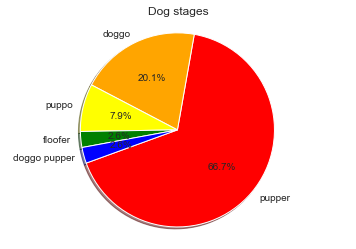

In [231]:
# Shows dog stages with a pie chart.
labels ='pupper', 'doggo', 'puppo', 'floofer', 'doggo pupper'
sizes=[126, 38, 15, 5, 5]
colors=['red', 'orange', 'yellow', 'green', 'blue']
plt.title('Dog stages')
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.show()

# Most Name used

In [232]:
name_count = df_all['name'].value_counts()
name_count.head(10)

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      8
Winston     8
Sadie       8
Penny       8
Toby        7
Daisy       7
Name: name, dtype: int64

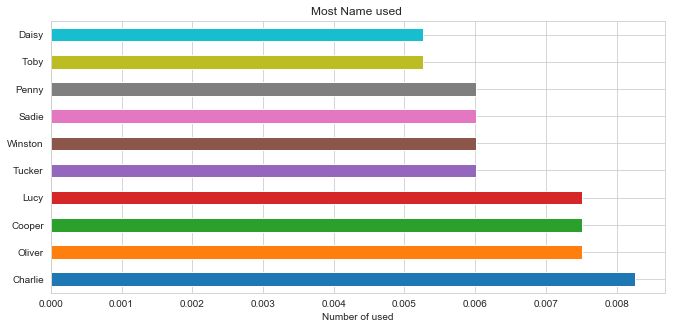

In [233]:
df_all['name'].value_counts(5)[0:10].plot('barh', figsize=(11,5), title='Most Name used ').set_xlabel("Number of used")
plt.savefig('twitter_source')

# Number of 'retweet_count', 'favorite_count'

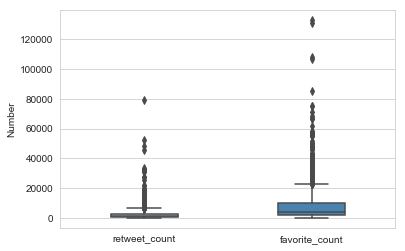

In [234]:
# Build the visualizations here
#Make a boxplot for both datasets
sns.set_style("whitegrid")
sns.boxplot(data=df_all[['retweet_count', 'favorite_count']], orient="v",width=0.4, palette="Blues");
plt.ylabel("Number");

as we see we have outlier in the both dataset


# favorite_count trend over time

In [235]:
fav_count = df_all['favorite_count'].std()
fav_count

11371.277139661217

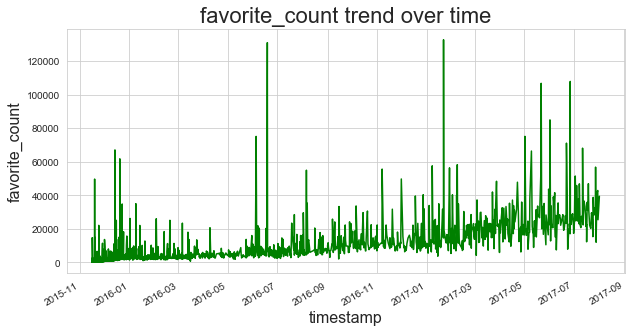

In [236]:
df_all.groupby('timestamp')['favorite_count'].mean().plot(kind='line', figsize = (10, 5), color = 'g')
#assign axis
plt.title('favorite_count trend over time', fontsize = 22)
plt.xlabel('timestamp', fontsize = 16)
plt.ylabel('favorite_count', fontsize = 16);

# Retweeting trend over time

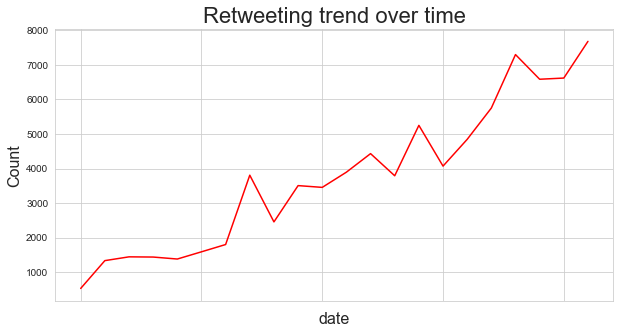

In [237]:
df_all.retweet_count.groupby([df_all["timestamp"].dt.year, df_all["timestamp"].dt.month]).mean().plot(kind='line', figsize = (10, 5), color = 'r')
plt.title(('Retweeting trend over time'),fontsize = 22)
plt.ylabel(('Count'),fontsize = 16)
plt.xlabel(('date'),fontsize = 16);